In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 'Wholesale_data.csv'
df = pd.read_csv('./Datasets/Wholesale_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
x = df.iloc[:,2:]
x.sample(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
51,3347,4051,6996,239,1538,301
83,20874,1563,1783,2320,550,772
404,18073,4613,3444,4324,914,715
194,7107,1012,2974,806,355,1142
280,3366,2884,2431,977,167,1104


In [6]:
x.shape

(440, 6)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [9]:
x_sc = sc.fit_transform(x)
x_sc

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [10]:
print(x_sc.shape)
print(type(x_sc))

(440, 6)
<class 'numpy.ndarray'>


In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=6)
x_new = pca.fit_transform(x_sc)
x_new

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154,  0.49528148,
        -0.00741414],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036,  0.36557931,
         0.05457185],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154, -0.37905353,
        -0.27753858],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 , -0.53876786,
        -0.08534909],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824, -0.09321487,
        -0.028943  ],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678,  0.10990335,
         0.02897846]])

In [13]:
eig_val = pca.explained_variance_ # eigen values
eig_vec = pca.components_         # eigen vectors
print(eig_val)
print(eig_vec)

[2.65099857 1.70646229 0.74175057 0.56501435 0.28632709 0.06311455]
[[ 0.04288396  0.54511832  0.57925635  0.05118859  0.5486402   0.24868198]
 [ 0.52793212  0.08316765 -0.14608818  0.61127764 -0.25523316  0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [-0.04868278  0.82657929 -0.31499943 -0.02793224 -0.33964012 -0.31470051]
 [-0.03602539 -0.03804019  0.72174458 -0.01563715 -0.68589373 -0.07513412]]


In [14]:
res = pca.explained_variance_ratio_*100
print(res)

[44.08289288 28.37639953 12.3344129   9.39550375  4.7612724   1.04951854]


In [15]:
pca = (eig_vec.dot(x_sc.T)).T
pca

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154,  0.49528148,
        -0.00741414],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036,  0.36557931,
         0.05457185],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154, -0.37905353,
        -0.27753858],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 , -0.53876786,
        -0.08534909],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824, -0.09321487,
        -0.028943  ],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678,  0.10990335,
         0.02897846]])

In [16]:
x_new

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154,  0.49528148,
        -0.00741414],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036,  0.36557931,
         0.05457185],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154, -0.37905353,
        -0.27753858],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 , -0.53876786,
        -0.08534909],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824, -0.09321487,
        -0.028943  ],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678,  0.10990335,
         0.02897846]])

In [17]:
pca4 = PCA(n_components=4)
pca4 = pca4.fit_transform(x_sc)
print(pca4)

[[ 0.19329055 -0.30509996 -0.14087845 -0.48643154]
 [ 0.4344199  -0.32841262  0.31900662 -0.17883036]
 [ 0.81114323  0.8150957   1.52341562 -1.25408154]
 ...
 [ 3.46570362 -1.03983801 -0.71316141  0.0334078 ]
 [-0.91802273 -0.03004659  0.25840805 -0.52457824]
 [-1.10513709 -0.86133787  0.30515404 -0.11437678]]


In [18]:
df_pca = pd.DataFrame(pca4,columns=['PC1','PC2','PC3','PC4'])
df_pca.head()

,PC1,PC2,PC3,PC4
0,0.193291,-0.305100,-0.140878,-0.486432
1,0.434420,-0.328413,0.319007,-0.178830
2,0.811143,0.815096,1.523416,-1.254082
3,-0.778648,0.652754,0.163012,0.380060
4,0.166287,1.271434,0.066279,-0.826227


In [19]:
df_pca.shape

(440, 4)

In [20]:
from sklearn.cluster import KMeans

#### Elbow Method

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[2486.595119118078, 1801.34096545943, 1464.630164490089, 1175.375761873641, 909.5382816298608, 766.4430678136778, 674.1316697416213, 595.3728930016155, 507.8693503115799, 451.8963588770648, 418.3296885862244, 388.3976861613865, 354.94575568324933, 340.79794236021115, 313.41875849561626, 294.1943477493549, 276.4718544349073, 262.6974238334412, 234.96765254786098, 226.30193198731115]


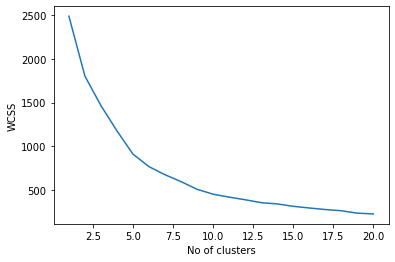

In [21]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit(df_pca)
    wcss.append(km.inertia_)
    
print(wcss)
plt.plot(range(1,21),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmean5 = KMeans(5)
kmean5.fit(x)

KMeans(n_clusters=5)

In [23]:
ypred5 = kmean5.predict(x)
ypred5

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 3, 1, 0, 0, 0, 1, 3, 1, 0, 1, 0, 1,
       0, 3, 0, 0, 1, 1, 3, 0, 0, 1, 0, 0, 1, 1, 0, 3, 3, 4, 0, 0, 3, 3,
       1, 3, 3, 2, 1, 3, 1, 1, 0, 3, 0, 1, 3, 3, 1, 1, 1, 2, 1, 3, 1, 2,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 3, 1, 1, 1, 3, 1, 0, 1, 2, 2, 4,
       1, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 4, 1, 0, 3, 3, 1, 3,
       1, 3, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 4, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 3, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 3, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3,
       4, 1, 1, 1, 1, 4, 3, 4, 1, 1, 1, 1, 3, 3, 0, 1, 1, 3, 1, 0, 0, 1,
       1, 1, 3, 3, 0, 1, 1, 3, 1, 1, 1, 3, 0, 2, 1, 1, 3, 3, 3, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 4, 0, 0,
       0, 1, 1, 3, 1, 1, 0, 1, 1, 3, 1, 0, 1, 0, 1, 1, 4, 4, 1, 1, 0, 1,
       3, 3, 3, 0, 3, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 4, 0, 4, 0,
       1, 0, 0, 0, 1, 1, 1, 3, 0, 1, 0, 1, 1, 1, 0,

In [24]:
df_pca['Clusters5'] = ypred5
df_pca.head()

,PC1,PC2,PC3,PC4,Clusters5
0,0.193291,-0.305100,-0.140878,-0.486432,1
1,0.434420,-0.328413,0.319007,-0.178830,1
2,0.811143,0.815096,1.523416,-1.254082,1
3,-0.778648,0.652754,0.163012,0.380060,1
4,0.166287,1.271434,0.066279,-0.826227,0


In [25]:
df['Clusters5'] = ypred5
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters5
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [26]:
df['Clusters5'].value_counts()

1    233
0    106
3     81
4     13
2      7
Name: Clusters5, dtype: int64